# 请自行安装 anaconda3 tensorflow keras!

# 以下为范例程序，请仔细阅读。我将讲解

In [62]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

In [5]:
print(K.image_data_format())

channels_last


In [41]:
(x_train, y_train),  (x_test, y_test) = mnist.load_data()

print(x_train.shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(-1, 1, img_rows, img_cols)
    x_test = x_test.reshape(-1, 1, img_rows, img_cols)
    input_shape = x_train[0].shape
else:
    x_train = x_train.reshape(-1, img_rows, img_cols, 1)
    x_test = x_test.reshape(-1, img_rows, img_cols, 1)
    input_shape = x_train[0].shape

print(x_train.shape)    

(60000, 28, 28)
(60000, 28, 28, 1)


In [42]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


In [43]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [44]:
y_train.shape

(60000, 10)

In [52]:
model1 = Sequential(
    [
        Conv2D(4, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(8, (3, 3), activation='relu',padding='same'), 
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (3, 3), activation='relu',padding='same'), 
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2), 
        Flatten(), 
        Dense(256, activation='relu', ), 
        Dropout(0.5), 
        Dense(num_classes, activation='softmax'),        
    ]
)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 3, 3, 16)          0         
__________

### 优化器的选取

https://img-blog.csdn.net/20170331170531161

In [53]:
len(x_test)

10000

In [54]:
model1.compile(
            optimizer=keras.optimizers.Adadelta(), 
            loss='categorical_crossentropy', 
            metrics=['accuracy']
              )

In [55]:
model1.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1, 
          validation_data=(x_test, y_test)
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.5662 - acc: 0.8095 - val_loss: 0.1226 - val_acc: 0.9593
Epoch 2/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.1929 - acc: 0.9402 - val_loss: 0.0823 - val_acc: 0.9741
Epoch 3/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.1531 - acc: 0.9525 - val_loss: 0.0660 - val_acc: 0.9791
Epoch 4/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.1294 - acc: 0.9598 - val_loss: 0.0598 - val_acc: 0.9811
Epoch 5/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.1189 - acc: 0.9630 - val_loss: 0.0594 - val_acc: 0.9812
Epoch 6/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.1084 - acc: 0.9665 - val_loss: 0.0518 - val_acc: 0.9826
Epoch 7/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0995 - acc: 0.9683 - val_loss: 0.0505 - 

9

In [64]:
A.find(max(A))

AttributeError: 'numpy.ndarray' object has no attribute 'find'

In [63]:
A = np.array(list(range(10)))


In [70]:
def get_number(A):
    return where(A==max(A))[0][0]
get_number(model1.predict(x_test[0:1])[0])

7

Populating the interactive namespace from numpy and matplotlib
image index:  0


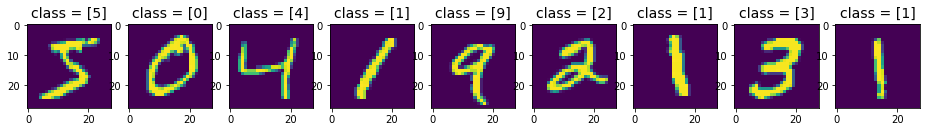

image index:  10000


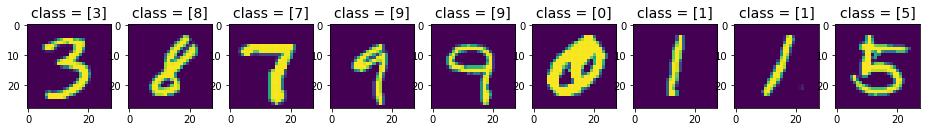

image index:  20000


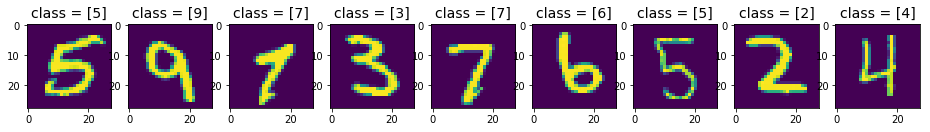

image index:  30000


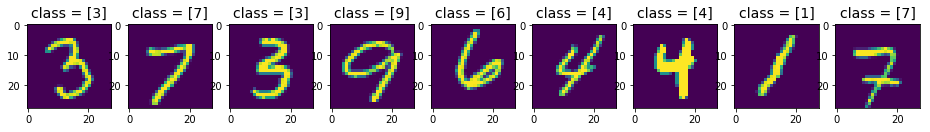

image index:  40000


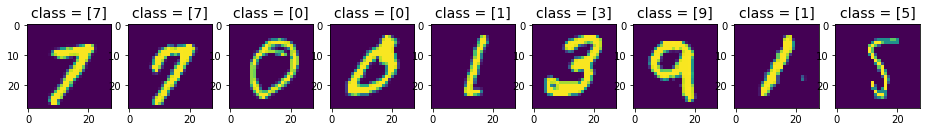

image index:  50000


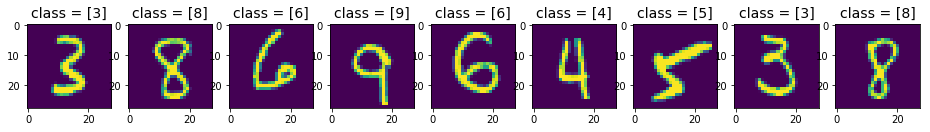

In [73]:
%pylab inline
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

for istart  in [0, 10000, 20000, 30000, 40000, 50000]:

    print('image index: ',istart)
    fig, axs = subplots(1,9, figsize=(16,4))

    row = 0
    for ax in axs:
            ax.imshow(X_train[row+istart]); row+=1
            ax.set_title('class = '+str([get_number(x) for x in model1.predict(x_train[row-1+istart:row+istart])]),
                        fontsize=14)
    plt.show()

In [14]:
model2 = Sequential([Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape,padding='same'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(64, (3, 3), activation='relu',padding='same'), MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2), Flatten(), Dense(256, activation='relu'), Dropout(0.5), 
                    Dense(num_classes, activation='softmax'),
                    ])
model2.compile(optimizer=keras.optimizers.Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

ValueError: Error when checking target: expected dense_4 to have 2 dimensions, but got array with shape (60000, 10, 10)

In [ ]:
model3 = Sequential([Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape,padding='same'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(64, (3, 3), activation='relu',padding='same'), MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.5), Flatten(), Dense(256, activation='relu'), Dropout(0.5), 
                    Dense(num_classes, activation='softmax'),
                    ])
model3.compile(optimizer=keras.optimizers.Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
model4 = Sequential([Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(64, (3, 3), activation='relu'), MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(128, (3, 3), activation='relu'), MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2), Flatten(), Dense(256, activation='relu'), Dropout(0.5), 
                    Dense(num_classes, activation='softmax'),
                    ])
model4.compile(optimizer=keras.optimizers.Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
model5 = Sequential([Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(128, (3, 3), activation='relu'), MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(256, (3, 3), activation='relu'), MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2), Flatten(), Dense(256, activation='relu'), Dropout(0.5), 
                    Dense(num_classes, activation='softmax'),
                    ])
model5.compile(optimizer=keras.optimizers.Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

### 卷积层是CNN的核心，层的参数由一组可学习的滤波器（filter）或内核（kernels）组成，

每个滤波器对输入进行卷积，计算滤波器和输入之间的点积，并产生该滤波器的二维激活图（输入一般二维向量，但可能有高度（即RGB））。 

简单来说，卷积层是用来对输入层进行卷积，提取更高层次的特征。

In [9]:
model.add(Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


### 池化层又称下采样，它的作用是减小数据处理量同时保留有用信息，它是怎么做到的呢？

通常池化层是每邻域四个像素中的最大值变为一个像素（这就是max_pooling），为什么可以这么做呢？

这是因为卷积已经提取出特征，相邻区域的特征是类似，近乎不变，这是池化只是选出最能表征特征的像素，缩减了数据量，同时保留了特征，何乐而不为呢？

池化层的作用可以描述为模糊图像，丢掉了一些不是那么重要的特征. 

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Dropout

Dropout是由Srivastava等人在2014年的一篇论文中提出的一种针对神经网络模型的正则化方法“Dropout: A Simple Way to Prevent Neural Networks from Overfitting”（下载PDF）。

Dropout是在训练期间随机选择的一些神经元忽略的技术。他们随机“Dropout”。这意味着它们对下游神经元的激活的贡献暂时消除，并且在反向过程没有实施任何权重的更新。

随着神经网络学习，神经元的权重会与网络上下文适应。神经元的权重为特定的特性提供一些专门化的调整。相邻的神经元变得依赖于这种专业化，如果过度使用，会导致这种过度专业化的模型脆弱不堪，无法训练数据。神经元在训练过程中的这种依赖上下文的现象被称为复杂的协同适应（complex co-adaptations）。

你可以想象，如果神经元在训练期间被随机地从网络中舍弃，那么其他的神经元将不得不介入并处理对缺失的神经元做出预测所需要的表征。这被认为可以让网络学习到多个独立的内部表征。

它的效果是让网络对神经元的特定权重变得不那么敏感。让网络能够更好地泛化，并且很少过拟合训练数据。
Keras中的Dropout正则化

每轮权重更新，以给定的概率(例如20%)从随机选择的节点中舍弃，这个过程很容易实现。这就是在Keras中实现Dropout。Dropout仅在训练模型时使用，在评估模型的技能时不使用。

请参考：

http://blog.christianperone.com/wp-content/uploads/2015/08/dropout.jpeg

In [13]:
model.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Flatten层

用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。

In [14]:
model.add(Flatten())

### 全连接层

softmax用于多分类过程中，它将多个神经元的输出，映射到（0,1）区间内，可以看成概率来理解，从而来进行多分类

参见 https://pic1.zhimg.com/50/v2-87b232ab0e292a536e94b73952caadd0_hd.jpg

In [15]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### 编译

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

### 拟合

In [16]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

NameError: name 'model' is not defined

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 59s 988us/step - loss: 0.2556 - acc: 0.9196 - val_loss: 0.0606 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0885 - acc: 0.9736 - val_loss: 0.0432 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0653 - acc: 0.9808 - val_loss: 0.0353 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0539 - acc: 0.9839 - val_loss: 0.0327 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0474 - acc:

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02805477033753068
Test accuracy: 0.992
